<a href="https://colab.research.google.com/github/taliafabs/sta365-winter2025/blob/main/sta365hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA365 Applied Bayesian Statistics Homework 2

January 22, 2025

---


## Question 1

Complete the code below showing the sequential posterior distributions created as each observation is observed.

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for } \theta =\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

- step by step evolution of posterior

two things are happening:
1. prior is changed -- it is now a binomial likelihood and a discrete uniform prior.
getting assigned to the p in the prior
density is 1/101
p is the parameter going into data model
we put prior over it over the p parameter going into the data model
this time we arent doing the math on paper, we are doing element-wise multiplication machinery
liklihood (binomial), discrete uniform prior, element-wise multiplication to produce posterior
prior is a vector of discrete points with equal probability
prior would look like a flat blue line, draw it as 101 points, equal probability on each possible value
should have 10 posterior plots

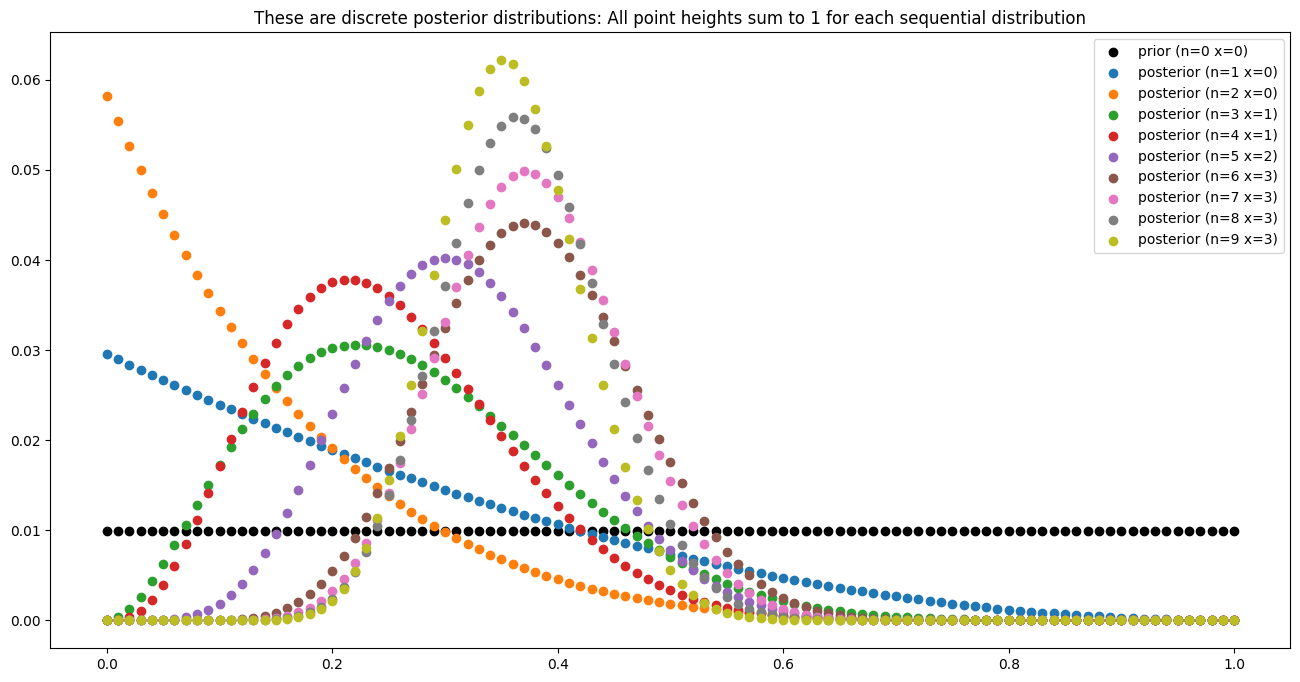

In [ ]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

parameter_domain = np.linspace(0,1,101)
prior = np.ones(101)/101

observations = 0,0,1,0,1,1,0,0,0
n,x = 0,0
plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")

for observation in observations:
    # use these for batch updates based on a binomial distribution
    # or do updates in a truly sequential manner using Bernoulli
    # prior = posterior  # for each Bernoulli observation update
    # update posterior and show it, add 1 data point each time
    n += 1
    x += observation
    likelihood = stats.binom.pmf(k=x, n=n, p=parameter_domain)
    # start w base prior
    # moment data is added, prior becomes posterior
    # new posterior
    # posterior is prior element wise * likelihood
    prior = prior * likelihood
    prior = prior / np.sum(prior)
    posterior = likelihood * prior
    posterior = posterior / np.sum(posterior)
    # plot it
    plt.scatter(parameter_domain, posterior, label="posterior (n="+str(n)+" x="+str(x)+")")

plt.legend();

## Question 2
Return to the last few questions of the lecture and consider the question $\theta_1^{true} < \theta_2^{true}$.

1. Let the $(t)$ superscript indicate time and consider the posteriors

   $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$
   This is a beta distribution
   
2. Set $n_j^{(0)}=x_j^{(0)}=0$ and iterate time using `for t in range(m):`

3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where the chance of flipping based on $\theta_2^{true}$ is $\Pr(\theta_1 < \theta_2 | n_1^{(t)},x_1^{(t)},n_2^{(t)},x_2^{(t)})$

4. Update the $n_j^{(t+1)}$ and $x_j^{(t+1)}$ as appropriate

5. If your algorithm is working then this will automatically learn which of $\theta_1^{true}$ and $\theta_2^{true}$ is larger

This procedure is known as the **Bayesian multi-armed bandit** and is considered a very useful tool for effectively balancing the **exploration-exploitation** tradeoff in the so-called **AB testing** context. You can always search for more information about something to help understanding better.

*Provide some visualizations demonstrating the learning process that the algorithm undergoes.*

In [1]:
# question 2
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

# go back to beta prior
# flipping one of two coins
# same sequential process
# use status of each one to decide which to run

# probabilities of success
theta1 = 0.4
theta2 = 0.6

# beta distribution hyperparameters
alpha1, beta1 = 1, 1
alpha2, beta2 = 1, 1

# num success & num total trials
n1, x1, = 0, 0
n2, x2 = 0, 0

# iterate time
m = 100
cumulative = []
arms = []

for t in range(m):
  # set the theta_hats before flipping the coin
  theta_hat1 = np.random.beta(alpha1, beta1)
  theta_hat2 = np.random.beta(alpha2, beta2)

  # select an arm
  if theta_hat1 > theta_hat2:
    arm = 1
  else:
    arm = 2

  # flip the coin
  if arm == 1:
    p = np.random.rand() < theta1
    x1 += 1
    n1 += 1
    alpha1 += p
    beta1 += 1 - p
  else:
    p = np.random.rand() < theta1
    x2 += 1
    n2 += 1
    alpha2 += p
    beta2 += 1 - p

  cumulative.append(sum([x1, x2]))
  arms.append(arm)

  # update hyperparameters

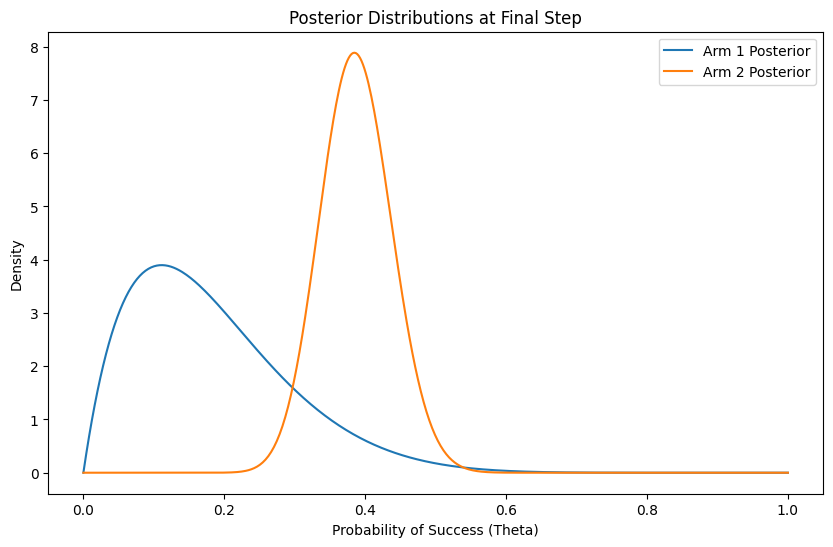

In [2]:
# Posterior Distribution
t_values = np.linspace(0, 1, 500)
plt.figure(figsize=(10, 6))
plt.plot(t_values, stats.beta.pdf(t_values, alpha1, beta1), label="Arm 1 Posterior")
plt.plot(t_values, stats.beta.pdf(t_values, alpha2, beta2), label="Arm 2 Posterior")
plt.title("Posterior Distributions at Final Step")
plt.xlabel("Probability of Success (Theta)")
plt.ylabel("Density")
plt.legend()
plt.show()

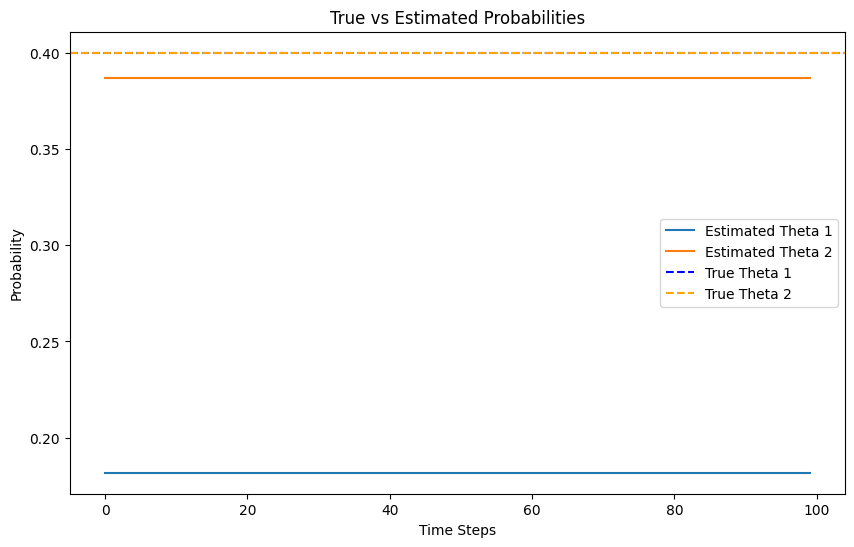

In [3]:
# True probabilities vs estimated probabilities
plt.figure(figsize=(10, 6))
plt.plot(range(m), [alpha1 / (alpha1 + beta1)] * m, label="Estimated Theta 1")
plt.plot(range(m), [alpha2 / (alpha2 + beta2)] * m, label="Estimated Theta 2")
plt.axhline(theta1, color='blue', linestyle='--', label="True Theta 1")
plt.axhline(theta1, color='orange', linestyle='--', label="True Theta 2")
plt.title("True vs Estimated Probabilities")
plt.xlabel("Time Steps")
plt.ylabel("Probability")
plt.legend()
plt.show()

## Question 3
Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data:

Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above

Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

Discuss which of the two approaches you think is most appropriate and describe an actual real world AB testing context where you could deploy this Bayesian multi-armed bandit to effectively balancing the exploration-exploitation tradeoff in that setting.